In [8]:
from pathlib import Path
import dill

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.animation as animation
import seaborn as sns

In [9]:
DATAFOLDER = Path("..\\data")
FIGSFOLDER = Path("C:\\Users\\jmc010\\Dropbox\\Publications in Progress\\Roitman_Current Opinion\\figs")
RESULTSFOLDER = Path("..\\results")
df = pd.read_excel("..\\experiment_info_gsheet.xlsx", sheet_name="Sheet1")

In [10]:
with open(DATAFOLDER / "snips_dict.pickle", "rb") as f:
    snips_dict = dill.load(f)
    
rats = ["SVG130", "SVG132", "SVG134", "SVG135", "SVG137", "SVG139"]

c:\Users\jmc010\AppData\Local\mambaforge\envs\default\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jmc010\AppData\Local\mambaforge\envs\default\lib\site-packages\numpy\_core\_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\jmc010\AppData\Local\mambaforge\envs\default\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jmc010\AppData\Local\mambaforge\envs\default\lib\site-packages\numpy\_core\_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\jmc010\AppData\Local\mambaforge\envs\default\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jmc010\AppData\Local\mambaforge\envs\default\lib\site-pack

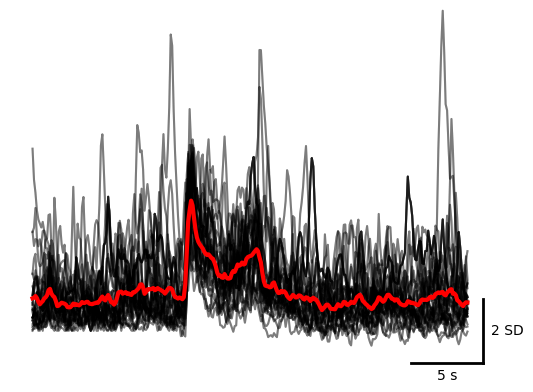

In [11]:
snips = snips_dict["SVG135_FD"]

f, ax = plt.subplots()
ax.set_ylim(-1.5, 10)

for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

ax.plot((260, 310), (-1, -1), color="black", linewidth=2)
ax.text(285, -1.5, "5 s", ha="center")

ax.plot((310, 310), (-1, 1), color="black", linewidth=2)
ax.text(315, 0, "2 SD", va="center")

traces = []

def update(frame):
    if frame < snips.shape[0]:
        trace, = ax.plot(snips[frame, :], color="black", alpha=0.3)
        traces.append(trace)
        mean_trace = np.mean(snips[:frame, :], axis=0)

        if 'mean_line' in update.__dict__:
            update.mean_line.remove()
        
        update.mean_line, = ax.plot(mean_trace, color="red", linewidth=3)
    return traces + [update.mean_line]

# Create the animation
ani = animation.FuncAnimation(f, update, frames=len(snips), blit=True, repeat=False, interval=250)

# Save the animation as a GIF
ani.save(RESULTSFOLDER / 'animated_snips.gif', writer='pillow')
ani.save(RESULTSFOLDER / 'animated_snips.mp4', writer='ffmpeg')




In [12]:
ani.save?

Signature:
ani.save(
    filename,
    writer=None,
    fps=None,
    dpi=None,
    codec=None,
    bitrate=None,
    extra_args=None,
    metadata=None,
    extra_anim=None,
    savefig_kwargs=None,
    *,
    progress_callback=None,
)
Docstring:
Save the animation as a movie file by drawing every frame.

Parameters
----------
filename : str
    The output filename, e.g., :file:`mymovie.mp4`.

writer : `MovieWriter` or str, default: :rc:`animation.writer`
    A `MovieWriter` instance to use or a key that identifies a
    class to use, such as 'ffmpeg'.

fps : int, optional
    Movie frame rate (per second).  If not set, the frame rate from the
    animation's frame interval.

dpi : float, default: :rc:`savefig.dpi`
    Controls the dots per inch for the movie frames.  Together with
    the figure's size in inches, this controls the size of the movie.

codec : str, default: :rc:`animation.codec`.
    The video codec to use.  Not all codecs are supported by a given
    `MovieWriter`.

b